# Fallstudie Machine Learning - Price Predicition Model in Retail

## Geschäftsverständnis

Einzelhandelsunternehmen sind einer hohen Marktdynamik ausgesetzt, welche die Preisbildung der Händler beeinflusst. Die Anpassung der Preise von einer Vielzahl an Produkten an den sich stetig ändernden Marktsituationen, unter Beachtung von mehreren Preisbildungsfaktoren, stellt für viele Händler eine große Herausforderung dar. Um dieser Herausforderung entgegenzuwirken, verwenden Händler zunehmend dynamische Preisbildungsstrategien, die jedoch in den meisten Fällen starren Preisregeln folgen und zu Preisverzerrungen führen. Im Einzelhandel ist die genaue Vorhersage von Produktpreisen somit entscheidend für die Optimierung von Preisstrategien, die Maximierung der Rentabilität und die Erhaltung der Wettbewerbsfähigkeit. 

Die Problemstellung dieser Arbeit lautet daher: Entwicklung eines maschinellen Lernmodells zur Vorhersage des optimalen Preises für Einzelhandelsprodukte auf der Grundlage historischer Preisdaten und verschiedener relevanter Merkmale.

### Behandelte Fragestellungen

1. Wie kann ein Unternehmen aus dem Einzelhandels-Sektor ein Machine-Learning Modell einsetzen, um seine Preisgestaltung zu optimieren?
2. Anhand welcher Merkmale und mit welcher Genauigkeit lassen sich Preise für Einzelhandelsprodukte mit einem Regressionsmodell vorhersagen?

## Data Understanding

### Relevante Bibliotheken importieren

In [1]:
# Im ersten Schritt werden die relevante Bibliotheken mit dem import command importiert

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Datenaufbereitung
from sklearn.preprocessing import LabelEncoder

# Libraries zu der Datenaufbereitung und zu den Modellen sind in den jeweiligen Zeilen importiert 


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Loading the raw data

In [2]:
# Zunächst werden die Daten aus einer .csv-Datei geladen

raw_data = pd.read_csv('/Users/egurta/Desktop/Master_DBM/2.Semester/AI/Case Study/product_info.csv')

In [3]:
# Die Daten aus der .csv-Datei anzeigen lassen

raw_data

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


In [4]:
# Die Funktion zeigt die ersten paar Zeilen des Datensatzes an
# Dies dient dazu einen schnellen Überblick über die Daten zu erhalten und ihre Struktur zu verstehen
# Bei der Funktion data.head() werden standardmäßig die obersten fünf Zeilen angezeigt

raw_data.head(5)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [5]:
# Eine knappe Zusammenfassung des Datensatzes wird dargelegt, um die Struktur und die Eigenschaften des Datensatzes schnell zu verstehen
# Es werden Informationen über die Spalten, ihre Datentypen und das Vorhandensein von fehlenden Werten geliefert

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

### Untersuchung der Deskriptiven Statistik

In [6]:
raw_data.describe(include='all')

#Zielvariable ist 'price_usd'

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
count,8494,8494,8494.000000,8494,8.494000e+03,8216.000000,8216.000000,6863,7050,6896,...,8494.000000,8494.000000,8494.000000,6287,8494,8486,7504,8494.000000,2754.000000,2754.000000
unique,8494,8415,NaN,304,NaN,NaN,NaN,2055,7,2729,...,NaN,NaN,NaN,4417,9,41,118,NaN,NaN,NaN
top,P473671,Fragrance Discovery Set,NaN,SEPHORA COLLECTION,NaN,NaN,NaN,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,NaN,NaN,NaN,"['Layerable Scent', 'Floral Scent']",Skincare,Women,Perfume,NaN,NaN,NaN
freq,1,3,NaN,352,NaN,NaN,NaN,500,4043,374,...,NaN,NaN,NaN,64,2420,875,568,NaN,NaN,NaN
mean,NaN,NaN,5422.440546,NaN,2.917957e+04,4.194513,448.545521,NaN,NaN,NaN,...,0.219096,0.073699,0.279374,NaN,NaN,NaN,NaN,1.631622,53.792023,39.665802
std,NaN,NaN,1709.595957,NaN,6.609212e+04,0.516694,1101.982529,NaN,NaN,NaN,...,0.413658,0.261296,0.448718,NaN,NaN,NaN,NaN,5.379470,58.765894,38.685720
min,NaN,NaN,1063.000000,NaN,0.000000e+00,1.000000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,3.000000
25%,NaN,NaN,5333.000000,NaN,3.758000e+03,3.981725,26.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,22.000000,19.000000
50%,NaN,NaN,6157.500000,NaN,9.880000e+03,4.289350,122.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,32.000000,28.000000
75%,NaN,NaN,6328.000000,NaN,2.684125e+04,4.530525,418.000000,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,59.000000,42.000000


In [7]:
selected_columns = ['brand_id','loves_count','rating','reviews','price_usd','value_price_usd','sale_price_usd','child_max_price','child_min_price']
raw_data[selected_columns].describe()


,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,child_max_price,child_min_price
count,8494.000000,8.494000e+03,8216.000000,8216.000000,8494.000000,451.000000,270.000000,2754.000000,2754.000000
mean,5422.440546,2.917957e+04,4.194513,448.545521,51.655595,91.168537,20.207889,53.792023,39.665802
std,1709.595957,6.609212e+04,0.516694,1101.982529,53.669234,79.195631,24.327352,58.765894,38.685720
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,3.000000,3.000000
25%,5333.000000,3.758000e+03,3.981725,26.000000,25.000000,45.000000,8.000000,22.000000,19.000000
50%,6157.500000,9.880000e+03,4.289350,122.000000,35.000000,67.000000,14.000000,32.000000,28.000000
75%,6328.000000,2.684125e+04,4.530525,418.000000,58.000000,108.500000,25.000000,59.000000,42.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,570.000000,400.000000


## Data Cleansing - Bestimmung der relevanten Variablen 

### Encode categorial variables

In [8]:
# Umwandlung der Datentypen von den Spalten 'primary_category, secondary_category, tertiary_category' von Object zu Integer

label_encoder = LabelEncoder()
raw_data['encoded_category'] = label_encoder.fit_transform(raw_data['primary_category'])

label_encoder2 = LabelEncoder()
raw_data['encoded_category2'] = label_encoder2.fit_transform(raw_data['secondary_category'])

label_encoder3 = LabelEncoder()
raw_data['encoded_category3'] = label_encoder3.fit_transform(raw_data['tertiary_category'])

# Alte Spalten werden entfernt, da diese ersetzt wurden

columns_to_drop = ['primary_category', 'secondary_category','tertiary_category']
raw_data = raw_data.drop(columns_to_drop, axis=1)

In [9]:
import pandas as pd
# Im nachfolgenden Block werden die Daten der Spalte 'size' so aufbereitet, dass diese besser verwertbar werden
# Hierfür wird 'size' in vier Spalten getrennt 'amount_oz','unit_oz','amount_2','unit_2', da am häufigsten die Einheit von size oz/ml oder oz/g ist

raw_data['size'] = raw_data['size'].str.replace(' ', '')

print(raw_data['size'])

# Die Spalten nach dem Begrenzungsbereich werden aufgeteilt und neue Spalten werden erstellt
split_data = raw_data['size'].str.split('/', expand=True)


raw_data['size_oz'] = split_data[0]
raw_data['size_2'] = split_data[1]

print(raw_data['size_oz'])
print(raw_data['size_2'])

# Menge und Einheit werden in separate Spalten extrahiert für size_oz
amount_unit_data_oz = raw_data['size_oz'].str.extract(r'^(\d+([.,]\d+)?)?([a-zA-Z]+)?$')
raw_data['amount_oz'] = amount_unit_data_oz[0]
raw_data['unit_oz'] = amount_unit_data_oz[2]

# Menge und Einheit werden in separate Spalten extrahiert size_2
amount_unit_data_2 = raw_data['size_2'].str.extract(r'^(\d+([.,]\d+)?)?([a-zA-Z]+)?$')
raw_data['amount_2'] = amount_unit_data_2[0]
raw_data['unit_2'] = amount_unit_data_2[2]

# Fehlende Werte werden in den Spalten "unit_oz" und "unit_2" mit einer empty string gefüllt.
raw_data['unit_oz'] = raw_data['unit_oz'].fillna('')
raw_data['unit_2'] = raw_data['unit_2'].fillna('')


filtered_data_oz = raw_data[raw_data['unit_oz'].str.contains('[lgo]')]

filtered_data_2 = raw_data[raw_data['unit_2'].str.contains('[lgo]')]

# Die gefilterten DataFrames sich anzeigen lassen
print(filtered_data_oz)
print(filtered_data_2)
print(raw_data['amount_oz'])
print(raw_data['unit_oz'])
print(raw_data['amount_2'])
print(raw_data['unit_2'])


0               NaN
1       3.4oz/100mL
2       3.4oz/100mL
3       3.4oz/100mL
4       3.4oz/100mL
           ...     
8489            NaN
8490       2oz/60mL
8491            NaN
8492            NaN
8493    .11oz/3.2mL
Name: size, Length: 8494, dtype: object
0         NaN
1       3.4oz
2       3.4oz
3       3.4oz
4       3.4oz
        ...  
8489      NaN
8490      2oz
8491      NaN
8492      NaN
8493    .11oz
Name: size_oz, Length: 8494, dtype: object
0         NaN
1       100mL
2       100mL
3       100mL
4       100mL
        ...  
8489      NaN
8490     60mL
8491      NaN
8492      NaN
8493    3.2mL
Name: size_2, Length: 8494, dtype: object
     product_id                            product_name  brand_id  \
1       P473668                 La Habana Eau de Parfum      6342   
2       P473662               Rainbow Bar Eau de Parfum      6342   
3       P473660                    Kasbah Eau de Parfum      6342   
4       P473658               Purple Haze Eau de Parfum      6342   
5 

In [10]:
# Umwandlung vom Typ Object zu Integer

label_encoder2 = LabelEncoder()
raw_data['encoded_unit_oz'] = label_encoder2.fit_transform(raw_data['unit_oz'])

label_encoder3 = LabelEncoder()
raw_data['encoded_unit_2'] = label_encoder3.fit_transform(raw_data['unit_2'])

columns_to_drop = ['unit_oz', 'unit_2','size_oz','size_2']
raw_data = raw_data.drop(columns_to_drop, axis=1)

In [11]:
# Umwandlung von Typ Object zu Float

raw_data['amount_oz'] = raw_data['amount_oz'].astype(float)
raw_data['amount_2'] = raw_data['amount_2'].astype(float)

In [12]:
# Datentypen anzeigen lassen, um weitere Umwandlungen vorzubeugen
data_types = raw_data.dtypes

print(data_types)

product_id            object
product_name          object
brand_id               int64
brand_name            object
loves_count            int64
rating               float64
reviews              float64
size                  object
variation_type        object
variation_value       object
variation_desc        object
ingredients           object
price_usd            float64
value_price_usd      float64
sale_price_usd       float64
limited_edition        int64
new                    int64
online_only            int64
out_of_stock           int64
sephora_exclusive      int64
highlights            object
child_count            int64
child_max_price      float64
child_min_price      float64
encoded_category       int64
encoded_category2      int64
encoded_category3      int64
amount_oz            float64
amount_2             float64
encoded_unit_oz        int64
encoded_unit_2         int64
dtype: object


In [13]:
# Aufruf von der Menge der einzelnen Inhalte von 'amount_oz' um sicherzustellen, dass float die richitge Wahl ist

def count_amount_oz(raw_data):
    amount_oz_counts = raw_data['amount_oz'].value_counts()
    return amount_oz_counts
count_amount_oz(raw_data)

1.700    712
1.000    654
3.400    330
0.500    291
5.000    197
        ... 
0.730      1
0.084      1
0.152      1
6.520      1
1.040      1
Name: amount_oz, Length: 343, dtype: int64

In [14]:
# Die Korrelationen der einzelnen features werden anhand der Korrelationsmatrix geprüft

correlation_matrix = raw_data.corr()
print(correlation_matrix)

                   brand_id  loves_count    rating   reviews  price_usd  \
brand_id           1.000000    -0.035604 -0.052433 -0.070557  -0.066667   
loves_count       -0.035604     1.000000  0.041797  0.683786  -0.089607   
rating            -0.052433     0.041797  1.000000  0.069801   0.056738   
reviews           -0.070557     0.683786  0.069801  1.000000  -0.055304   
price_usd         -0.066667    -0.089607  0.056738 -0.055304   1.000000   
value_price_usd   -0.032419    -0.062963  0.105132  0.017110   0.950908   
sale_price_usd     0.204826    -0.102487  0.097451 -0.031161   0.953726   
limited_edition    0.004533    -0.069116 -0.050978 -0.081380   0.046343   
new                0.027141    -0.076058  0.102084 -0.054899   0.028793   
online_only        0.107290    -0.163905 -0.022032 -0.141340   0.091808   
out_of_stock      -0.081976    -0.053776 -0.046998 -0.063988  -0.022198   
sephora_exclusive  0.124417     0.040512  0.018961 -0.025970  -0.140527   
child_count       -0.0962

/var/folders/_k/3pp8d0ws07ng2l1ssh37yb_m0000gn/T/ipykernel_17946/3829411576.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = raw_data.corr()


In [15]:
# Grafische Darstellung wird zusätzlich erstellt für eine einfachere Analyse der Korrelationen

corr = raw_data.corr()
corr.style.background_gradient(cmap='coolwarm')

/var/folders/_k/3pp8d0ws07ng2l1ssh37yb_m0000gn/T/ipykernel_17946/4184945410.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = raw_data.corr()


,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price,encoded_category,encoded_category2,encoded_category3,amount_oz,amount_2,encoded_unit_oz,encoded_unit_2
brand_id,1.000000,-0.035604,-0.052433,-0.070557,-0.066667,-0.032419,0.204826,0.004533,0.027141,0.107290,-0.081976,0.124417,-0.096247,-0.199234,-0.217974,0.043927,-0.023666,-0.019355,0.057192,0.138803,-0.019252,0.017660
loves_count,-0.035604,1.000000,0.041797,0.683786,-0.089607,-0.062963,-0.102487,-0.069116,-0.076058,-0.163905,-0.053776,0.040512,0.408203,-0.104384,-0.139251,0.072427,-0.104315,-0.027928,-0.060682,-0.146108,0.045455,0.029531
rating,-0.052433,0.041797,1.000000,0.069801,0.056738,0.105132,0.097451,-0.050978,0.102084,-0.022032,-0.046998,0.018961,0.003946,0.107003,0.109185,0.001390,0.037063,-0.028282,0.024486,0.069178,0.042875,0.050679
reviews,-0.070557,0.683786,0.069801,1.000000,-0.055304,0.017110,-0.031161,-0.081380,-0.054899,-0.141340,-0.063988,-0.025970,0.286604,-0.043836,-0.123081,0.077122,-0.072247,0.020523,-0.047198,-0.108326,0.076739,0.084549
price_usd,-0.066667,-0.089607,0.056738,-0.055304,1.000000,0.950908,0.953726,0.046343,0.028793,0.091808,-0.022198,-0.140527,-0.051893,0.771175,0.647940,-0.079494,0.286558,-0.004664,-0.029488,-0.013052,-0.014279,-0.007937
value_price_usd,-0.032419,-0.062963,0.105132,0.017110,0.950908,1.000000,0.881194,0.078578,0.155181,0.082985,-0.048401,-0.027303,-0.060864,0.927760,0.784437,0.069680,0.108583,-0.134225,-0.050108,-0.024553,-0.046112,-0.046508
sale_price_usd,0.204826,-0.102487,0.097451,-0.031161,0.953726,0.881194,1.000000,0.153528,nan,0.246329,-0.198436,-0.183794,-0.066505,0.794241,0.649473,-0.100186,0.299903,0.097651,0.026173,0.199040,-0.045422,-0.039549
limited_edition,0.004533,-0.069116,-0.050978,-0.081380,0.046343,0.078578,0.153528,1.000000,0.155662,0.061462,0.162170,0.066938,-0.062251,-0.005318,-0.003846,-0.065780,0.071784,0.075693,0.012247,0.047078,-0.311551,-0.293741
new,0.027141,-0.076058,0.102084,-0.054899,0.028793,0.155181,nan,0.155662,1.000000,0.042553,0.014177,0.066984,-0.003873,-0.023746,0.005099,0.008695,0.053929,0.043413,-0.020851,-0.009309,-0.077350,-0.024597
online_only,0.107290,-0.163905,-0.022032,-0.141340,0.091808,0.082985,0.246329,0.061462,0.042553,1.000000,0.002011,-0.100806,-0.091615,0.040024,0.069144,-0.093130,0.071530,0.006088,0.016651,0.093758,-0.030828,-0.028106


In [16]:
# Die Korrelationen der Merkmale mit der Zielvariable "price_usd" werden hier geprüft 
correlation_with_price = correlation_matrix['price_usd']

print(correlation_with_price)

brand_id            -0.066667
loves_count         -0.089607
rating               0.056738
reviews             -0.055304
price_usd            1.000000
value_price_usd      0.950908
sale_price_usd       0.953726
limited_edition      0.046343
new                  0.028793
online_only          0.091808
out_of_stock        -0.022198
sephora_exclusive   -0.140527
child_count         -0.051893
child_max_price      0.771175
child_min_price      0.647940
encoded_category    -0.079494
encoded_category2    0.286558
encoded_category3   -0.004664
amount_oz           -0.029488
amount_2            -0.013052
encoded_unit_oz     -0.014279
encoded_unit_2      -0.007937
Name: price_usd, dtype: float64


In [17]:
# Spalten, die nicht relevant sind für die Erstellung des ML-Modells, werden bestimmt und als nächstes entfernt
variables_to_drop = ['product_id', 'loves_count', 'rating', 'reviews', 'new','out_of_stock','brand_name','product_name','variation_value','variation_type','variation_desc','ingredients','highlights', 'size', 'value_price_usd', 'sale_price_usd', 'child_count','child_max_price','child_min_price']


In [18]:
# Irrelevante Spalten werden aus dem Datensatz entfernt
data = raw_data.drop(variables_to_drop, axis=1)

In [19]:
# Deskripitive Statistik ohne die entfernten Spalten wird geprüft
data.describe(include='all')

,brand_id,price_usd,limited_edition,online_only,sephora_exclusive,encoded_category,encoded_category2,encoded_category3,amount_oz,amount_2,encoded_unit_oz,encoded_unit_2
count,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,6424.000000,6390.000000,8494.000000,8494.000000
mean,5422.440546,51.655595,0.070285,0.219096,0.279374,4.084295,22.720155,70.013186,4.052766,81.507637,51.438074,17.517189
std,1709.595957,53.669234,0.255642,0.413658,0.448718,2.291889,11.427747,34.574830,11.829738,98.479136,29.770354,11.206049
min,1063.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000200,0.007000,0.000000,0.000000
25%,5333.000000,25.000000,0.000000,0.000000,0.000000,3.000000,12.000000,43.000000,0.500000,10.500000,19.000000,8.000000
50%,6157.500000,35.000000,0.000000,0.000000,0.000000,4.000000,20.000000,72.000000,1.700000,50.000000,69.000000,24.000000
75%,6328.000000,58.000000,0.000000,0.000000,1.000000,7.000000,35.000000,100.000000,4.700000,118.000000,69.000000,24.000000
max,8020.000000,1900.000000,1.000000,1.000000,1.000000,8.000000,41.000000,118.000000,400.000000,1239.000000,93.000000,55.000000


### Missing Values

In [20]:
# Hier wird der Datensatz mit den relevanten Features auf fehlende Werte im Datensatz geprüft, um zu bestimmen ob diese entfernt werden müssen oder eine Imputaion erfolgen sollte.
data.isnull().sum()

brand_id                0
price_usd               0
limited_edition         0
online_only             0
sephora_exclusive       0
encoded_category        0
encoded_category2       0
encoded_category3       0
amount_oz            2070
amount_2             2104
encoded_unit_oz         0
encoded_unit_2          0
dtype: int64

In [21]:
# data_no_mv = data.dropna(axis=0)

In [22]:
# data_no_mv.describe(include='all')
# Es wird ersichtlich, dass alle Umwandlungen erfolgreich waren und lediglich noch numerische Daten für das Modell vorhanden sind

data_no_mv = data

# Datentypen anzeigen lassen, um weitere Umwandlungen vorzubeugen
data_types = data_no_mv.dtypes

print(data_types)

brand_id               int64
price_usd            float64
limited_edition        int64
online_only            int64
sephora_exclusive      int64
encoded_category       int64
encoded_category2      int64
encoded_category3      int64
amount_oz            float64
amount_2             float64
encoded_unit_oz        int64
encoded_unit_2         int64
dtype: object


In [23]:
data_no_mv.head()

,brand_id,price_usd,limited_edition,online_only,sephora_exclusive,encoded_category,encoded_category2,encoded_category3,amount_oz,amount_2,encoded_unit_oz,encoded_unit_2
0,6342,35.0,0,1,0,1,38,100,NaN,NaN,0,0
1,6342,195.0,0,1,0,1,40,99,3.4,100.0,69,24
2,6342,195.0,0,1,0,1,40,99,3.4,100.0,69,24
3,6342,195.0,0,1,0,1,40,99,3.4,100.0,69,24
4,6342,195.0,0,1,0,1,40,99,3.4,100.0,69,24


In [24]:
print(data_no_mv.columns)


Index(['brand_id', 'price_usd', 'limited_edition', 'online_only',
       'sephora_exclusive', 'encoded_category', 'encoded_category2',
       'encoded_category3', 'amount_oz', 'amount_2', 'encoded_unit_oz',
       'encoded_unit_2'],
      dtype='object')


In [25]:
import pandas as pd
from sklearn.impute import KNNImputer

# Um die fehlenden Werte zu ersetzen, wird eine K-nearest neighbors (KNN)-Imputation durchgeführt
# Das Ergebnis ist, dass der Datensatz keine fehlenden Werte mehr in den Spalten "amount_oz" und "amount_2" enthält, da diese durch die KNN-Imputation erfolgreich ersetzt wurden

# Die Date werden die in Merkmalsvariablen (features) und Zielvariablen (target) aufgeteilt.
features = data_no_mv[data_no_mv.columns[:-2]]
target = data_no_mv[['amount_oz', 'amount_2']]

imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(features)

imputed_df = pd.DataFrame(imputed_data, columns=features.columns)

data_no_mv[['amount_oz', 'amount_2']] = imputed_df[['amount_oz', 'amount_2']]


### Exploring the Probability Distribution Function (PDF)

/var/folders/_k/3pp8d0ws07ng2l1ssh37yb_m0000gn/T/ipykernel_17946/2203863212.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['price_usd'])


<Axes: xlabel='price_usd', ylabel='Density'>

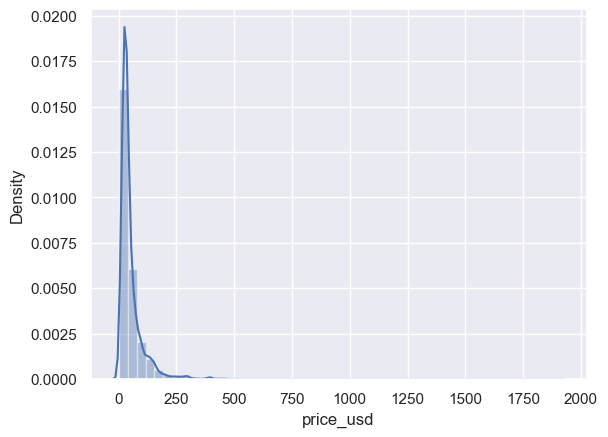

In [26]:
sns.distplot(data_no_mv['price_usd'])

<Axes: xlabel='price_usd', ylabel='Count'>

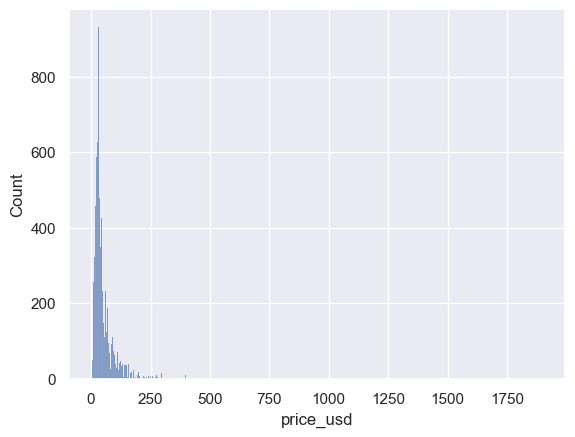

In [27]:
sns.histplot(data_no_mv['price_usd'])

In [28]:
data_no_mv.head()

,brand_id,price_usd,limited_edition,online_only,sephora_exclusive,encoded_category,encoded_category2,encoded_category3,amount_oz,amount_2,encoded_unit_oz,encoded_unit_2
0,6342,35.0,0,1,0,1,38,100,0.25,7.5,0,0
1,6342,195.0,0,1,0,1,40,99,3.40,100.0,69,24
2,6342,195.0,0,1,0,1,40,99,3.40,100.0,69,24
3,6342,195.0,0,1,0,1,40,99,3.40,100.0,69,24
4,6342,195.0,0,1,0,1,40,99,3.40,100.0,69,24


In [29]:
#count_brands(data_1)

### Outliers

In [30]:
# In diesem Code wird der 99. Quantil der Spalte 'price_usd' im DataFrame "data_no_mv" berechnet und in der Variable "q" gespeichert
# Das 99. Quantil ist der Wert, unter dem 99% der Daten liegen und 1% der Daten darüber liegen
q = data_no_mv['price_usd'].quantile(0.99)

In [31]:
# In diesem Code wird ein neuer DataFrame "data_1" erstellt, der nur die Datenpunkte aus dem ursprünglichen DataFrame "data_no_mv" enthält, deren Wert in der Spalte 'price_usd' kleiner als der zuvor berechnete Schwellenwert "q" ist 
# Ess werden somit nur die Datenpunkte ausgewählt, deren 'price_usd' Wert unterhalb des 99. Quantils liegt

data_1 = data_no_mv[data_no_mv['price_usd']<q]

data_1.describe(include='all')

,brand_id,price_usd,limited_edition,online_only,sephora_exclusive,encoded_category,encoded_category2,encoded_category3,amount_oz,amount_2,encoded_unit_oz,encoded_unit_2
count,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000
mean,5414.475062,48.341581,0.069992,0.217474,0.281633,4.084395,22.615879,70.018926,3.805892,79.051707,51.514701,17.540888
std,1716.933225,39.813756,0.255148,0.412552,0.449822,2.284345,11.406752,34.532262,10.722321,94.651795,29.723440,11.197460
min,1063.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000200,0.007000,0.000000,0.000000
25%,5333.000000,25.000000,0.000000,0.000000,0.000000,3.000000,12.000000,43.000000,0.500000,12.000000,24.000000,15.000000
50%,6159.000000,35.000000,0.000000,0.000000,0.000000,4.000000,20.000000,72.000000,1.700000,50.000000,69.000000,24.000000
75%,6328.000000,58.000000,0.000000,0.000000,1.000000,7.000000,35.000000,100.000000,4.200000,100.660000,69.000000,24.000000
max,8020.000000,270.000000,1.000000,1.000000,1.000000,8.000000,41.000000,118.000000,400.000000,1239.000000,93.000000,55.000000


/var/folders/_k/3pp8d0ws07ng2l1ssh37yb_m0000gn/T/ipykernel_17946/2387690156.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['price_usd'])


<Axes: xlabel='price_usd', ylabel='Density'>

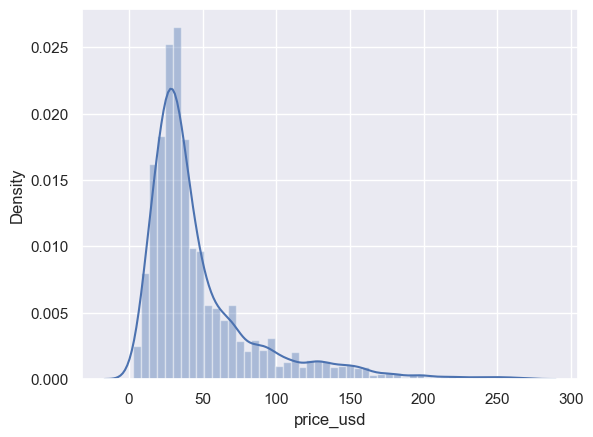

In [32]:
# Hier wird die PDF mit weniger Ausreißern dargestellt um Rückschlüsse ziehen zu können

sns.distplot(data_1['price_usd'])

In [33]:
def plot_brand_counts(data_1):
    brand_counts = data_1['brand_id'].value_counts()
    brand_counts.plot(kind='bar')
    plt.title('Count of Brands')
    plt.xlabel('Brand')
    plt.ylabel('Count')
    plt.show()

In [34]:
def count_brands(data_1):
    brand_counts = data_1['brand_id'].value_counts()
    return brand_counts
count_brands(data_1)

3902    352
1254    179
1073    136
5648    131
7025    115
       ... 
5805      1
6756      1
3866      1
7062      1
6275      1
Name: brand_id, Length: 303, dtype: int64

In [35]:
total_count = data_1['brand_id'].count()
print("Total Count:", total_count)

Total Count: 8401


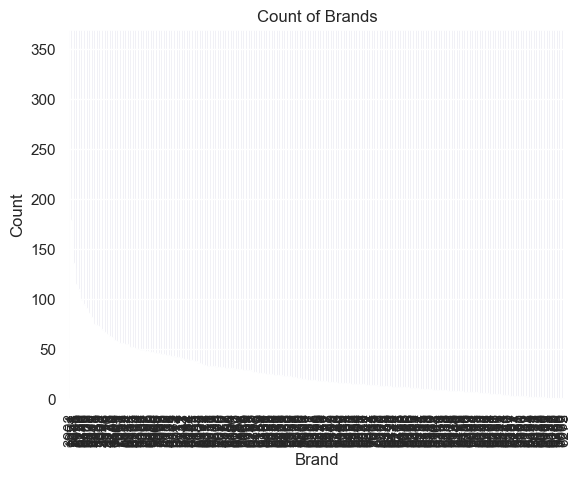

In [36]:
plot_brand_counts(data_1)


In [37]:
distinct_values = data_1['brand_id'].nunique()
print(distinct_values)

303


In [38]:
# Selten vorkommende "brand_ids" werden entfernt, um die Daten zu bereinigen und mögliche Auswirkungen von unrepräsentativen oder seltenen Werten zu reduzieren

total_entries = len(data_1)

# Berechnung des Schwellenwerts für die Mindestanzahl einer brand_id
threshold = int(total_entries * 0.01)

brand_id_counts = data_1['brand_id'].value_counts()

brands_to_delete = brand_id_counts[brand_id_counts < threshold].index

distinct_values_dropped = len(brands_to_delete)

data_2 = data_1[~data_1['brand_id'].isin(brands_to_delete)]

print(f"Number of distinct values dropped from 'brand_id': {distinct_values_dropped}")

Number of distinct values dropped from 'brand_id': 290


In [39]:
total_count2 = data_2['brand_id'].count()
print("Total Count:", total_count2)

Total Count: 1684


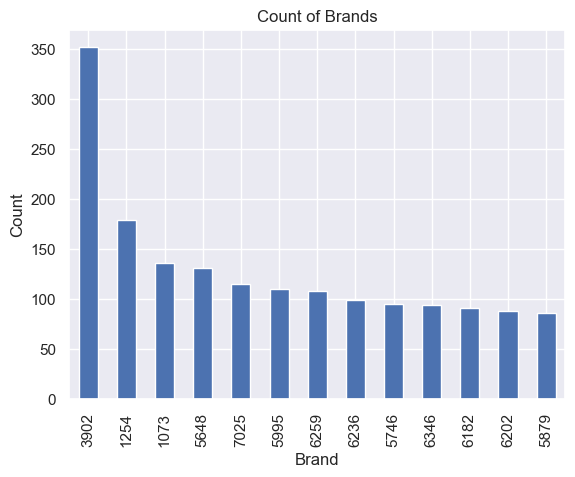

In [40]:
plot_brand_counts(data_2)

In [41]:
def plot_primary_category_counts(data_2):
    primary_category_counts = data_2['encoded_category'].value_counts()
    primary_category_counts.plot(kind='bar')
    plt.title('Count of primary_category')
    plt.xlabel('encoded_category')
    plt.ylabel('Count')
    plt.show()

In [42]:
def count_primary_category(data_2):
    primary_category_counts = data_2['encoded_category'].value_counts()
    return primary_category_counts

In [43]:
count_primary_category(data_2)

4    634
3    377
7    267
1    224
6     71
0     69
8     21
5     17
2      4
Name: encoded_category, dtype: int64

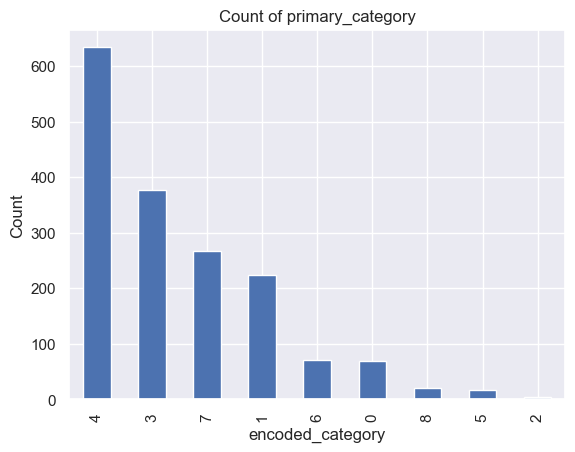

In [44]:
plot_primary_category_counts(data_2)

In [45]:
total_count3 = data_2['encoded_category'].count()
print("Total Count:", total_count3)

Total Count: 1684


In [46]:
# Selten vorkommende "encoded_categories" werden entfernt, um die Daten weiter zu bereinigen und mögliche Auswirkungen von unrepräsentativen oder seltenen Werten zu reduzieren 
# Nachdem diese Schritte abgeschlossen sind, enthält der DataFrame "data_3" die bereinigten Daten, die für das Training und die Bewertung des Regressionsmodells verwendet werden können

total_entries2 = len(data_2)

threshold2 = int(total_entries2 * 0.01)

primary_category_counts = data_2['encoded_category'].value_counts()

primary_categories_to_delete = primary_category_counts[primary_category_counts < threshold2].index

data_3 = data_2[~data_2['encoded_category'].isin(primary_categories_to_delete)]

In [47]:
total_count4 = data_3['encoded_category'].count()
print("Total Count:", total_count4)

Total Count: 1680


In [48]:
def plot_secondary_category_counts(data_3):
    secondary_category_counts = data_3['encoded_category2'].value_counts()
    secondary_category_counts.plot(kind='bar')
    plt.title('Count of encoded_category2')
    plt.xlabel('secondary_category')
    plt.ylabel('Count')
    plt.show()

In [49]:
def count_secondary_category(data_3):
    secondary_category_counts = data_3['encoded_category2'].value_counts()
    return secondary_category_counts

In [50]:
count_secondary_category(data_3)

17    219
12    191
14    138
8     113
31    113
20    109
9     103
40     92
38     58
27     54
37     46
11     45
7      43
10     36
26     36
16     29
22     28
24     28
13     23
34     22
0      21
36     18
2      16
39     15
19     12
25     11
23      9
21      8
6       8
35      7
5       7
30      6
32      4
18      3
15      3
28      3
3       1
41      1
33      1
Name: encoded_category2, dtype: int64

In [51]:
secondary_category_counts = data_3['encoded_category2'].value_counts()


In [52]:
total_count5 = data_3['encoded_category2'].count()
print("Total Count:", total_count5)

Total Count: 1680


In [53]:
# Erneut wird eine Datenbereinigungsmaßnahme getroffen, bei der selten vorkommende "encoded_categories2" entfernt werden
# Nachdem diese erfolgt ist, enthält der DataFrame "data_4" die weiter bereinigten Daten, die für das Training und die Bewertung des Regressionsmodells verwendet werden können

total_entries3 = len(data_3)

threshold3 = int(total_entries3 * 0.01)

secondary_category_counts = data_3['encoded_category2'].value_counts()

secondary_categories_to_delete = secondary_category_counts[secondary_category_counts < threshold3].index

data_4 = data_3[~data_3['encoded_category2'].isin(secondary_categories_to_delete)]

In [54]:
total_count6 = data_4['encoded_category2'].count()
print("Total Count:", total_count6)

Total Count: 1581


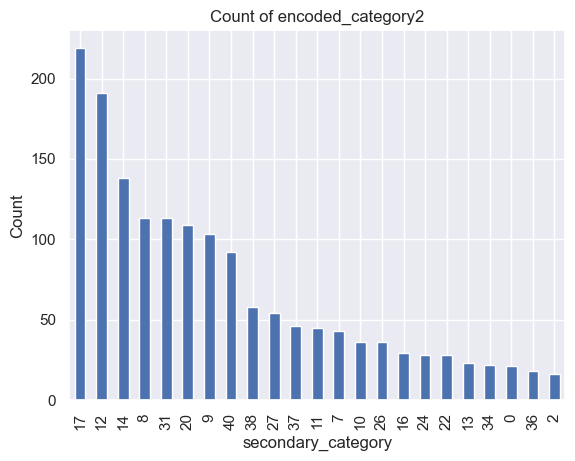

In [55]:
plot_secondary_category_counts(data_4) 

In [56]:
count_secondary_category(data_4)

17    219
12    191
14    138
8     113
31    113
20    109
9     103
40     92
38     58
27     54
37     46
11     45
7      43
10     36
26     36
16     29
24     28
22     28
13     23
34     22
0      21
36     18
2      16
Name: encoded_category2, dtype: int64

Total Count: 1581
Total Count: 1285


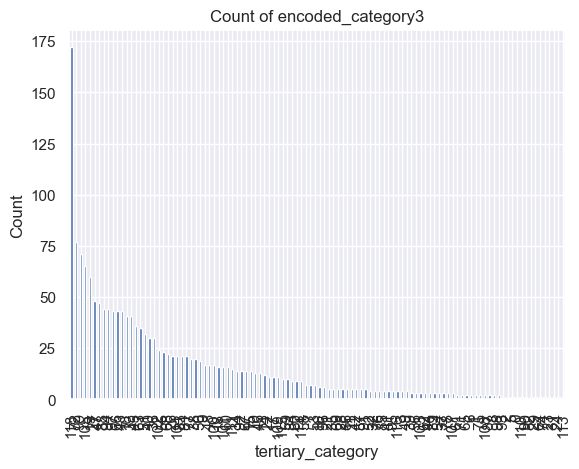

118    145
72      77
99      71
105     65
19      60
27      48
47      47
88      44
94      44
97      43
43      43
66      43
10      41
33      41
45      36
63      35
51      32
36      30
40      30
102     24
55      23
68      22
81      21
26      21
104     21
83      21
38      20
77      20
50      19
9       17
48      17
100     17
60      16
101     16
111     15
Name: encoded_category3, dtype: int64

In [57]:
# Es findet eine Datenanalyse und -visualisierung, um die Verteilung der "encoded_category3" besser zu verstehen
# Weitere Bereinigungsmaßnahmen werden durchgeführt, indem selten vorkommende "encoded_categories3" entfernt werden

def plot_tertiary_category_counts(data_4):
    tertiary_category_counts = data_3['encoded_category3'].value_counts()
    tertiary_category_counts.plot(kind='bar')
    plt.title('Count of encoded_category3')
    plt.xlabel('tertiary_category')
    plt.ylabel('Count')
    plt.show()
def count_tertiary_category(data_4):
    tertiary_category_counts = data_4['encoded_category3'].value_counts()
    return tertiary_category_counts
count_tertiary_category(data_4)
tertiary_category_counts = data_4['encoded_category3'].value_counts()
total_count7 = data_4['encoded_category3'].count()
print("Total Count:", total_count7)

total_entries4 = len(data_4)


threshold4 = int(total_entries4 * 0.01)


tertiary_category_counts = data_4['encoded_category3'].value_counts()


tertiary_categories_to_delete = tertiary_category_counts[tertiary_category_counts < threshold4].index

# Der Datensatz wird gefiltert um die secondary_categories zu entfernen
data_5 = data_4[~data_4['encoded_category3'].isin(tertiary_categories_to_delete)]
total_count8 = data_5['encoded_category3'].count()
print("Total Count:", total_count8)
plot_tertiary_category_counts(data_5)
count_tertiary_category(data_5)

In [58]:
data_cleaned = data_5.reset_index(drop=True)

In [59]:
data_cleaned.describe(include='all')

,brand_id,price_usd,limited_edition,online_only,sephora_exclusive,encoded_category,encoded_category2,encoded_category3,amount_oz,amount_2,encoded_unit_oz,encoded_unit_2
count,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000
mean,4970.774319,41.749805,0.091051,0.163424,0.279377,3.651362,19.498054,69.308949,4.419370,78.309590,51.505058,17.593774
std,1921.934547,32.917825,0.287793,0.369896,0.448868,1.869540,10.275233,33.089141,19.379347,96.532824,29.829620,10.975970
min,1073.000000,3.000000,0.000000,0.000000,0.000000,0.000000,7.000000,9.000000,0.000800,0.040000,0.000000,0.000000
25%,3902.000000,20.000000,0.000000,0.000000,0.000000,3.000000,12.000000,43.000000,0.330000,8.000000,15.000000,16.000000
50%,5879.000000,33.000000,0.000000,0.000000,0.000000,4.000000,17.000000,72.000000,1.690000,41.400000,69.000000,24.000000
75%,6236.000000,49.000000,0.000000,0.000000,1.000000,4.000000,27.000000,99.000000,5.000000,136.596000,69.000000,24.000000
max,7025.000000,260.000000,1.000000,1.000000,1.000000,8.000000,40.000000,118.000000,400.000000,1239.000000,73.000000,47.000000


In [60]:
# Erneut werden die Korrelationen aufgezeigt, um die Korrelationen in dem bereinigten Datensatz zu analysieren

correlation_matrix = data_cleaned.corr()
print(correlation_matrix)

                   brand_id  price_usd  limited_edition  online_only  \
brand_id           1.000000   0.018724         0.092422     0.154206   
price_usd          0.018724   1.000000         0.093536     0.048742   
limited_edition    0.092422   0.093536         1.000000    -0.000882   
online_only        0.154206   0.048742        -0.000882     1.000000   
sephora_exclusive -0.076900  -0.265321         0.044088    -0.153241   
encoded_category  -0.431478  -0.299695        -0.146501    -0.138283   
encoded_category2 -0.042587   0.352148         0.156632     0.036353   
encoded_category3 -0.052550   0.027690         0.079728     0.020051   
amount_oz          0.066131   0.056080        -0.026008    -0.001611   
amount_2           0.248122   0.234374        -0.004398     0.190218   
encoded_unit_oz    0.059918   0.157251        -0.247313     0.045028   
encoded_unit_2     0.062112   0.167798        -0.258505     0.071419   

                   sephora_exclusive  encoded_category  encoded

In [61]:
corr = data_cleaned.corr()
corr.style.background_gradient(cmap='coolwarm')

,brand_id,price_usd,limited_edition,online_only,sephora_exclusive,encoded_category,encoded_category2,encoded_category3,amount_oz,amount_2,encoded_unit_oz,encoded_unit_2
brand_id,1.000000,0.018724,0.092422,0.154206,-0.076900,-0.431478,-0.042587,-0.052550,0.066131,0.248122,0.059918,0.062112
price_usd,0.018724,1.000000,0.093536,0.048742,-0.265321,-0.299695,0.352148,0.027690,0.056080,0.234374,0.157251,0.167798
limited_edition,0.092422,0.093536,1.000000,-0.000882,0.044088,-0.146501,0.156632,0.079728,-0.026008,-0.004398,-0.247313,-0.258505
online_only,0.154206,0.048742,-0.000882,1.000000,-0.153241,-0.138283,0.036353,0.020051,-0.001611,0.190218,0.045028,0.071419
sephora_exclusive,-0.076900,-0.265321,0.044088,-0.153241,1.000000,0.131936,-0.021918,0.039332,0.102767,-0.041269,-0.181845,-0.112894
encoded_category,-0.431478,-0.299695,-0.146501,-0.138283,0.131936,1.000000,0.022344,0.250074,-0.124379,-0.339014,-0.084948,-0.063421
encoded_category2,-0.042587,0.352148,0.156632,0.036353,-0.021918,0.022344,1.000000,0.552981,0.003766,0.070511,0.138976,0.163490
encoded_category3,-0.052550,0.027690,0.079728,0.020051,0.039332,0.250074,0.552981,1.000000,-0.063399,-0.113116,-0.000052,0.025971
amount_oz,0.066131,0.056080,-0.026008,-0.001611,0.102767,-0.124379,0.003766,-0.063399,1.000000,0.110474,0.053706,0.204792
amount_2,0.248122,0.234374,-0.004398,0.190218,-0.041269,-0.339014,0.070511,-0.113116,0.110474,1.000000,0.222288,0.188046


## Checking the OLS assumptions

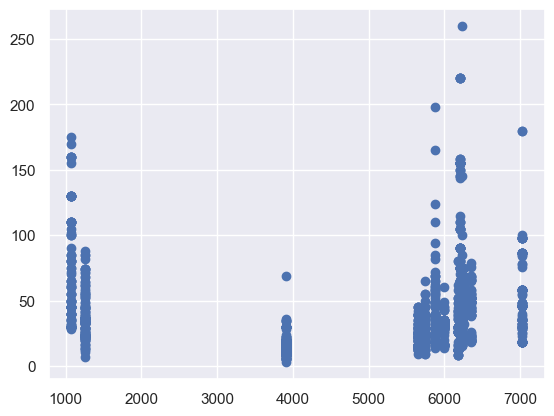

In [62]:
# Für die Erstellung eines einzelnen Plots wird der plt.scatter() verwendet

plt.scatter(data_cleaned['brand_id'],data_cleaned['price_usd'])

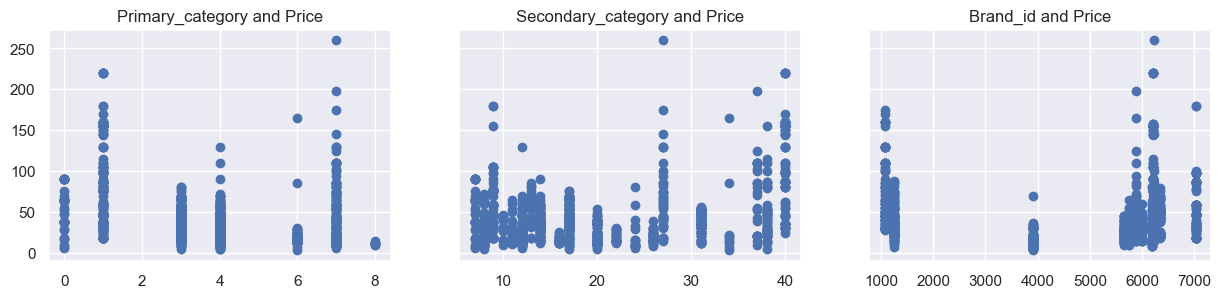

In [63]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))

ax1.scatter(data_cleaned['encoded_category'],data_cleaned['price_usd'])
ax1.set_title('Primary_category and Price')

ax2.scatter(data_cleaned['encoded_category2'],data_cleaned['price_usd'])
ax2.set_title('Secondary_category and Price')

ax3.scatter(data_cleaned['brand_id'],data_cleaned['price_usd'])
ax3.set_title('Brand_id and Price')

plt.show()

### Distribution - Log Transformation

In [64]:
log_price = np.log(data_cleaned['price_usd'])

In [65]:
data_cleaned['log_price'] = log_price
data_cleaned

,brand_id,price_usd,limited_edition,online_only,sephora_exclusive,encoded_category,encoded_category2,encoded_category3,amount_oz,amount_2,encoded_unit_oz,encoded_unit_2,log_price
0,5746,25.0,0,0,0,4,12,43,0.0030,0.085,69,16,3.218876
1,5746,21.0,0,0,0,4,12,43,0.1400,4.000,69,16,3.044522
2,5746,20.0,0,0,0,4,20,88,0.1100,3.200,69,16,2.995732
3,5746,45.0,0,0,0,4,12,40,0.4874,9.741,0,0,3.806662
4,5746,45.0,0,0,0,4,12,40,0.4874,9.741,0,0,3.806662
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,5648,16.0,0,1,0,6,22,118,0.1230,3.400,0,16,2.772589
1281,5648,14.0,0,0,0,7,26,118,0.5000,15.000,69,24,2.639057
1282,5648,35.0,0,0,0,4,14,104,0.5440,7.500,0,16,3.555348
1283,5648,39.0,0,0,0,7,37,51,1.0000,30.000,69,24,3.663562


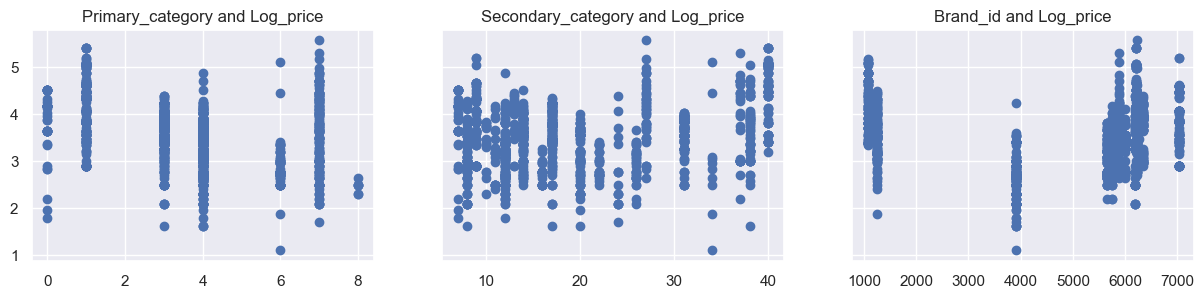

In [66]:
# Check the three scatters plots once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))

ax1.scatter(data_cleaned['encoded_category'],data_cleaned['log_price'])
ax1.set_title('Primary_category and Log_price')

ax2.scatter(data_cleaned['encoded_category2'],data_cleaned['log_price'])
ax2.set_title('Secondary_category and Log_price')

ax3.scatter(data_cleaned['brand_id'],data_cleaned['log_price'])
ax3.set_title('Brand_id and Log_price')

plt.show()

#Zu sehen ist, dass keine lineare Beziehung zwischen den Features und der Zielvariablen "price_usd" vorhanden ist

In [67]:
# Drop the old 'Price' variable
# data_cleaned = data_cleaned.drop(['price_usd'],axis=1)

# Dieser Schritt wurde entfernt und nicht weiter ausgeführt, da kein linearer Bezug zwischen den unabhängigen Variablen un der Zielvariablen festegstellt werden konnte

### Neuordnung der Spalten im Datensatz

In [68]:
data_cleaned.columns.values

array(['brand_id', 'price_usd', 'limited_edition', 'online_only',
       'sephora_exclusive', 'encoded_category', 'encoded_category2',
       'encoded_category3', 'amount_oz', 'amount_2', 'encoded_unit_oz',
       'encoded_unit_2', 'log_price'], dtype=object)

In [69]:
data_cleaned.describe(include='all')

,brand_id,price_usd,limited_edition,online_only,sephora_exclusive,encoded_category,encoded_category2,encoded_category3,amount_oz,amount_2,encoded_unit_oz,encoded_unit_2,log_price
count,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000
mean,4970.774319,41.749805,0.091051,0.163424,0.279377,3.651362,19.498054,69.308949,4.419370,78.309590,51.505058,17.593774,3.493948
std,1921.934547,32.917825,0.287793,0.369896,0.448868,1.869540,10.275233,33.089141,19.379347,96.532824,29.829620,10.975970,0.681740
min,1073.000000,3.000000,0.000000,0.000000,0.000000,0.000000,7.000000,9.000000,0.000800,0.040000,0.000000,0.000000,1.098612
25%,3902.000000,20.000000,0.000000,0.000000,0.000000,3.000000,12.000000,43.000000,0.330000,8.000000,15.000000,16.000000,2.995732
50%,5879.000000,33.000000,0.000000,0.000000,0.000000,4.000000,17.000000,72.000000,1.690000,41.400000,69.000000,24.000000,3.496508
75%,6236.000000,49.000000,0.000000,0.000000,1.000000,4.000000,27.000000,99.000000,5.000000,136.596000,69.000000,24.000000,3.891820
max,7025.000000,260.000000,1.000000,1.000000,1.000000,8.000000,40.000000,118.000000,400.000000,1239.000000,73.000000,47.000000,5.560682


In [70]:
# Eine neue Variable wird bestimmt, die die bevorzugte Reihenfolge enthalten wird
# Die gängigste Reihenfolge ist: abhängige Variable, unabhängige numerische Variablen

cols = ['price_usd','encoded_category3','encoded_category2', 'encoded_category', 'brand_id','amount_oz','amount_2','encoded_unit_oz','encoded_unit_2',
       'limited_edition', 'sephora_exclusive', 'online_only']

In [71]:
# Die Neuordnung wird implementiert 
# Ein neues Datenframe wird erstellt, der dem alten entspricht, aber die neue Reihenfolge der Merkmale enthält

data_cleaned = data_cleaned[cols]
data_cleaned.head()

,price_usd,encoded_category3,encoded_category2,encoded_category,brand_id,amount_oz,amount_2,encoded_unit_oz,encoded_unit_2,limited_edition,sephora_exclusive,online_only
0,25.0,43,12,4,5746,0.0030,0.085,69,16,0,0,0
1,21.0,43,12,4,5746,0.1400,4.000,69,16,0,0,0
2,20.0,88,20,4,5746,0.1100,3.200,69,16,0,0,0
3,45.0,40,12,4,5746,0.4874,9.741,0,0,0,0,0
4,45.0,40,12,4,5746,0.4874,9.741,0,0,0,0,0


## Modeling and Testing

### Lineares Regressionsmodell

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [73]:
# In diesem Schritt werden zuerst die Features des Datensatzes für das Machine Learning-Modell mit dem Standardscaler skaliert, um sicherzustellen, dass sie alle im gleichen Wertebereich liegen und die Modellleistung verbessert wird 

scaler = MinMaxScaler()
targets = data_cleaned['price_usd']
inputs = data_cleaned.drop(['price_usd'], axis=1)

X_scaled = scaler.fit_transform(inputs)



# In diesem Abschnitt wird der Datensatz in Trainings- und Testdaten aufgeteilt, um ein Machine Learning-Modell zu trainieren und zu evaluieren
# Dazu werden 20% der Daten für den Testdatensatz verwendet und 80% für den Trainingsdatensatz

x_train, x_test, y_train, y_test = train_test_split(X_scaled, targets, test_size=0.2, random_state=365)

# Es werden für jedes Modell die Metriken R2 und MSE verwendet um die Modelle zu evaluieren
# diese werden zuerst auf den Trainingsdaten und anschließend auf den Testdaten angwendet

In [74]:
print(data_cleaned.dtypes)

price_usd            float64
encoded_category3      int64
encoded_category2      int64
encoded_category       int64
brand_id               int64
amount_oz            float64
amount_2             float64
encoded_unit_oz        int64
encoded_unit_2         int64
limited_edition        int64
sephora_exclusive      int64
online_only            int64
dtype: object


### Create the Regression

In [75]:
# Durchführung des Linearen Regressionsmodells

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

reg = LinearRegression()

reg.fit(x_train, y_train)

y_hat_train = reg.predict(x_train)

# Berechnung des R2 value für die Trainingsdaten
r2_train = r2_score(y_train, y_hat_train)

# Berechnung des MSE für die Trainingsdaten
mse_train = mean_squared_error(y_true=y_train, y_pred=y_hat_train)

print("Train R2 Value:", r2_train)
print("Mean Squared Error (MSE) für Trainingsdaten:", mse_train)


#Testdaten

y_hat_test = reg.predict(x_test)

# Berechnung des R2 value für die Testdaten
r2_test = r2_score(y_test, y_hat_test)

# Berechnung des MSE für die Testdaten
mse_test = mean_squared_error(y_true=y_test, y_pred=y_hat_test)

print("Test R2 Value:", r2_test)
print("Mean Squared Error (MSE) für Testdaten:", mse_test)

Train R2 Value: 0.31201688165441943
Mean Squared Error (MSE) für Trainingsdaten: 766.9238368239911
Test R2 Value: 0.29455942943135394
Mean Squared Error (MSE) für Testdaten: 673.4958421172533


In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Hyperparameter werden definiert
hyperparameters = {
    'n_estimators': 100,  
    'max_depth': None,   
    'min_samples_split': 2,  
    'min_samples_leaf': 1,   
    'max_features': 'auto',  
    'random_state': 42  
}


reg = RandomForestRegressor(**hyperparameters)

reg.fit(x_train, y_train)

y_hat_train = reg.predict(x_train)

score_train = reg.score(x_train, y_train)

r2_train = r2_score(y_train, y_hat_train)

# Berechnung des MSE für die Trainingsdaten
mse_train = mean_squared_error(y_true=y_train, y_pred=y_hat_train)

print("Train R2 Value:", r2_train)
print("Mean Squared Error (MSE) für Trainingsdaten:", mse_train)

# Test Daten

y_hat_test = reg.predict(x_test)

r2_test = r2_score(y_test, y_hat_test)

mse_test = mean_squared_error(y_true=y_test, y_pred=y_hat_test)

print("Test R2 Value:", r2_test)
print("Mean Squared Error (MSE) für Testdaten:", mse_test)

/Users/egurta/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Train R2 Value: 0.9451075361118304
Mean Squared Error (MSE) für Trainingsdaten: 61.190947706788016
Test R2 Value: 0.8399000299225501
Mean Squared Error (MSE) für Testdaten: 152.8501034230872


In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Hyperparameter Tuning
hyperparameters = {
    'n_estimators': 700,  
    'max_depth': 20,   
    'min_samples_split': 2,  
    'min_samples_leaf': 1,   
    'max_features': 'auto',  
    'random_state': 42  
}

reg = RandomForestRegressor(**hyperparameters)

reg.fit(x_train, y_train)

y_hat_train = reg.predict(x_train)

score_train = reg.score(x_train, y_train)

r2_train = r2_score(y_train, y_hat_train)

# Berechnung des MSE für die Trainingsdaten
mse_train = mean_squared_error(y_true=y_train, y_pred=y_hat_train)

print("Train R2 Value:", r2_train)
print("Mean Squared Error (MSE) für Trainingsdaten:", mse_train)

# Test Daten


y_hat_test = reg.predict(x_test)


r2_test = r2_score(y_test, y_hat_test)

# Berechnung des MSE für die Testdaten
mse_test = mean_squared_error(y_true=y_test, y_pred=y_hat_test)

print("Test R2 Value:", r2_test)
print("Mean Squared Error (MSE) für Testdaten:", mse_test)

/Users/egurta/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Train R2 Value: 0.9477277096143211
Mean Squared Error (MSE) für Trainingsdaten: 58.270129648770926
Test R2 Value: 0.8498175754439529
Mean Squared Error (MSE) für Testdaten: 143.38165781428253


In [78]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Hyperparameter werden definiert
hyperparameters = {
    'n_estimators': 100,  
    'learning_rate': 0.1,  
    'max_depth': 3,  
    'min_samples_split': 2,  
    'min_samples_leaf': 1,  
    'max_features': None,  
    'random_state': 42  
}

reg = GradientBoostingRegressor(**hyperparameters)

reg.fit(x_train, y_train)

y_hat_train = reg.predict(x_train)

score_train = reg.score(x_train, y_train)

r2_train = r2_score(y_train, y_hat_train)

# Berechnung des MSE für die Trainingsdaten
mse_train = mean_squared_error(y_true=y_train, y_pred=y_hat_train)

print("Train R2 Value:", r2_train)
print("Mean Squared Error (MSE) für Trainingsdaten:", mse_train)

# Testdaten


y_hat_test = reg.predict(x_test)


r2_test = r2_score(y_test, y_hat_test)

# Berechnung des MSE für die Testdaten
mse_test = mean_squared_error(y_true=y_test, y_pred=y_hat_test)

print("Test R2 Value:", r2_test)
print("Mean Squared Error (MSE) für Testdaten:", mse_test)

Train R2 Value: 0.8855822280614855
Mean Squared Error (MSE) für Trainingsdaten: 127.54632245476175
Test R2 Value: 0.8686209012675924
Mean Squared Error (MSE) für Testdaten: 125.42981000662246


In [79]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Hyperparameter Tuning
hyperparameters = {
    'n_estimators': 500,  
    'learning_rate': 1.5,  
    'max_depth': 4,  
    'min_samples_split': 2,  
    'min_samples_leaf': 1,  
    'max_features': None,  
    'random_state': 42  
}

reg = GradientBoostingRegressor(**hyperparameters)


reg.fit(x_train, y_train)


y_hat_train = reg.predict(x_train)

score_train = reg.score(x_train, y_train)


r2_train = r2_score(y_train, y_hat_train)

# Berechnung des MSE für die Trainingsdaten
mse_train = mean_squared_error(y_true=y_train, y_pred=y_hat_train)

print("Train R2 Value:", r2_train)
print("Mean Squared Error (MSE) für Trainingsdaten:", mse_train)

# Testdaten


y_hat_test = reg.predict(x_test)


r2_test = r2_score(y_test, y_hat_test)

# Berechnung des MSE für die Testdaten
mse_test = mean_squared_error(y_true=y_test, y_pred=y_hat_test)

print("Test R2 Value:", r2_test)
print("Mean Squared Error (MSE) für Testdaten:", mse_test)

Train R2 Value: 0.9766005886444543
Mean Squared Error (MSE) für Trainingsdaten: 26.084312038604065
Test R2 Value: 0.5701215613578225
Mean Squared Error (MSE) für Testdaten: 410.4120929818144


In [80]:
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import r2_score

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate polynomial features
#degree = 2
#poly_features = PolynomialFeatures(degree=degree)
#x_train_poly = poly_features.fit_transform(x_train)
#x_test_poly = poly_features.transform(x_test)

# Create a linear regression model
#model = LinearRegression()

# Fit the model to the polynomial features
#model.fit(x_train_poly, y_train)

# Make predictions on the test set
#y_pred = model.predict(x_test_poly)

# Calculate R-squared score
#r2 = r2_score(y_test, y_pred)
#print("R-squared score:", r2)


# Dieser Schritt hat einen negativen Wert berechnet und wurde deshalb wieder entfernt

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Die Hyperparameter werden definiert
hyperparameters = {
    'n_estimators': 300,  
    'learning_rate': 0.1,  
    'max_depth': 3,  
    'min_child_weight': 1,  
    'subsample': 1,  
    'colsample_bytree': 1, 
    'reg_alpha': 0,  
    'reg_lambda': 1,  
    'random_state': 42  
}


reg = XGBRegressor(**hyperparameters)


reg.fit(x_train, y_train)


y_hat_train = reg.predict(x_train)


score_train = reg.score(x_train, y_train)


r2_train = r2_score(y_train, y_hat_train)

print("Train Score:", score_train)
print("Train R2 Value:", r2_train)

In [81]:
# Predict the target variable for the test data
y_hat_test = reg.predict(x_test)

# Calculate the R2 value for the test data
r2_test = r2_score(y_test, y_hat_test)

print("Test R2 Value:", r2_test)


Test R2 Value: 0.5701215613578225


In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Die Hyperparameter werden definiert
hyperparameters = {
    'max_depth': None,  
    'min_samples_split': 2,  
    'min_samples_leaf': 1,  
    'max_features': None,  
    'random_state': 42  
}


reg = DecisionTreeRegressor(**hyperparameters)


reg.fit(x_train, y_train)


y_hat_train = reg.predict(x_train)

score_train = reg.score(x_train, y_train)

# Berechne R2 Wert für die Trainingsdaten 
r2_train = r2_score(y_train, y_hat_train)

# Berechnung des MSE für die Trainingsdaten
mse_train = mean_squared_error(y_true=y_train, y_pred=y_hat_train)

print("Train R2 Value:", r2_train)
print("Mean Squared Error (MSE) für Trainingsdaten:", mse_train)

#Testdaten

y_hat_test = reg.predict(x_test)

# Berechne R2 Wert für die Testdaten
r2_test = r2_score(y_test, y_hat_test)

# Berechnung des MSE für die Testdaten
mse_test = mean_squared_error(y_true=y_test, y_pred=y_hat_test)

print("Test R2 Value:", r2_test)
print("Mean Squared Error (MSE) für Testdaten:", mse_test)

Train R2 Value: 0.9766008134719598
Mean Squared Error (MSE) für Trainingsdaten: 26.08406141388875
Test R2 Value: 0.6629227534914559
Mean Squared Error (MSE) für Testdaten: 321.81325184180866


In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Hyperparameter Tuning
hyperparameters = {
    'max_depth': 50,  
    'min_samples_split': 2,  
    'min_samples_leaf': 1,  
    'max_features': None,  
    'random_state': 42  
}


reg = DecisionTreeRegressor(**hyperparameters)


reg.fit(x_train, y_train)


y_hat_train = reg.predict(x_train)


score_train = reg.score(x_train, y_train)

# Berechnung des R2 für die Trainingsdaten
r2_train = r2_score(y_train, y_hat_train)

# Berechnung des MSE für die Trainingsdaten
mse_train = mean_squared_error(y_true=y_train, y_pred=y_hat_train)

print("Train R2 Value:", r2_train)
print("Mean Squared Error (MSE) für Trainingsdaten:", mse_train)

#Testdaten


y_hat_test = reg.predict(x_test)

# Berechnung des R2 für die Testdaten
r2_test = r2_score(y_test, y_hat_test)

# Berechnung des MSE für die Testdaten
mse_test = mean_squared_error(y_true=y_test, y_pred=y_hat_test)

print("Test R2 Value:", r2_test)
print("Mean Squared Error (MSE) für Testdaten:", mse_test)

Train R2 Value: 0.9766008134719598
Mean Squared Error (MSE) für Trainingsdaten: 26.08406141388875
Test R2 Value: 0.6629227534914559
Mean Squared Error (MSE) für Testdaten: 321.81325184180866


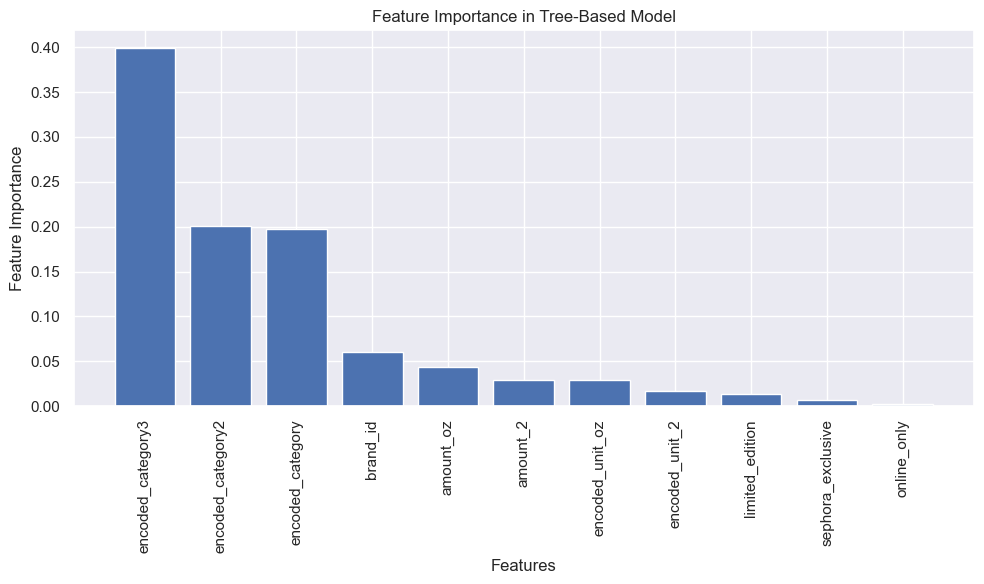

In [84]:
# Die Feature Importance wird hier abgerufen und nach Wichtigkeit sortiert
# Das Feature "encoded_category3" weist die höchste Importance auf und "online_only" hat den geringsten Einfluss auf die Zielvaribale "price_usd"

feature_importances = reg.feature_importances_

import numpy as np
import matplotlib.pyplot as plt

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]

# Feature names as provided
feature_names = ['encoded_category3', 'encoded_category2', 'encoded_category', 'brand_id', 'amount_oz', 'amount_2', 'encoded_unit_oz', 'encoded_unit_2', 'limited_edition', 'sephora_exclusive', 'online_only']

# Create a bar plot to visualize the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), sorted_feature_importances, tick_label=feature_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Tree-Based Model')
plt.tight_layout()
plt.show()



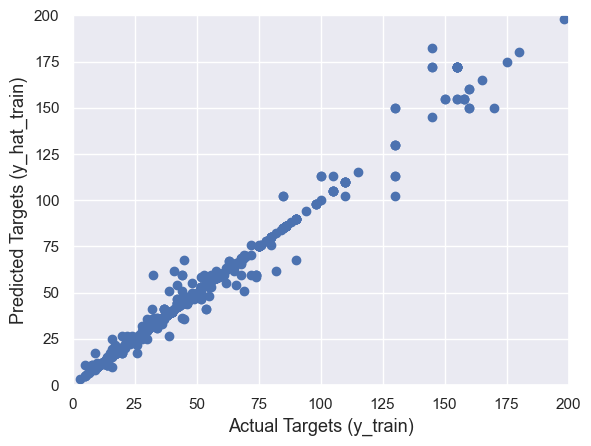

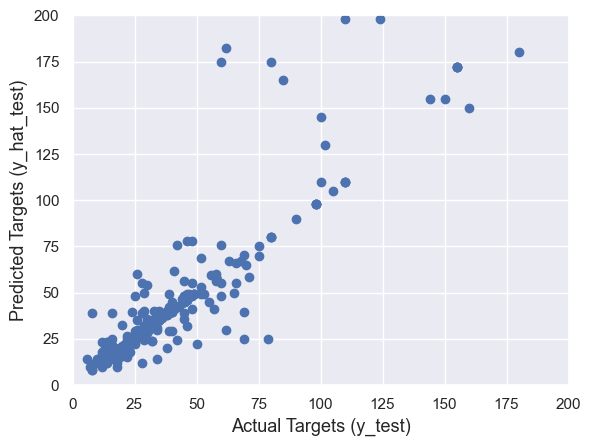

In [85]:
# Plotting der Vorhersagen
plt.scatter(y_train, y_hat_train)
plt.xlabel('Actual Targets (y_train)', size=13)
plt.ylabel('Predicted Targets (y_hat_train)', size=13)
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.show()


plt.scatter(y_test, y_hat_test)
plt.xlabel('Actual Targets (y_test)', size=13)
plt.ylabel('Predicted Targets (y_hat_test)', size=13)
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.show()

/var/folders/_k/3pp8d0ws07ng2l1ssh37yb_m0000gn/T/ipykernel_17946/4190340571.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat_train)


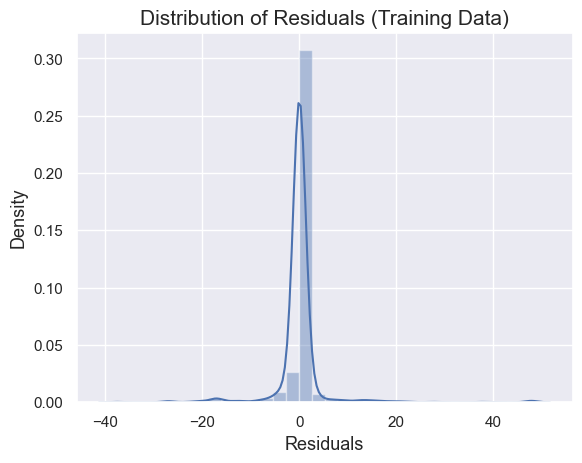

/var/folders/_k/3pp8d0ws07ng2l1ssh37yb_m0000gn/T/ipykernel_17946/4190340571.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_hat_test)


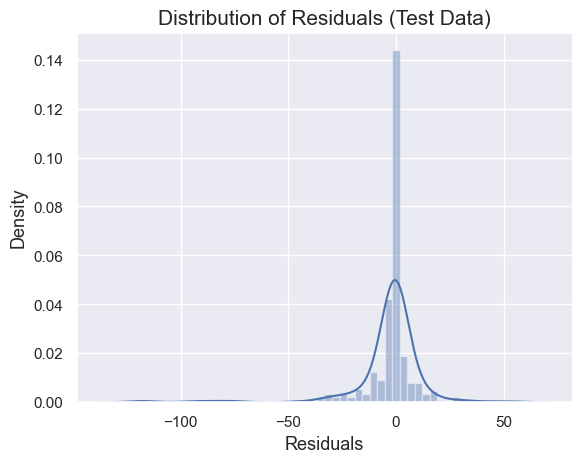

In [86]:
# Plotting der Vorhersagen
sns.distplot(y_train - y_hat_train)
plt.xlabel('Residuals', size=13)
plt.ylabel('Density', size=13)
plt.title('Distribution of Residuals (Training Data)', size=15)
plt.show()

sns.distplot(y_test - y_hat_test)
plt.xlabel('Residuals', size=13)
plt.ylabel('Density', size=13)
plt.title('Distribution of Residuals (Test Data)', size=15)
plt.show()

In [87]:
# Hier findet eine Manuelle Überprüfung dieser Ergebnisse statt

df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,5.540622e+34
1,8.659340e+16
2,1.694889e+28
3,1.545539e+25
4,7.271363e+32


In [88]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,5.540622e+34,NaN
1,8.659340e+16,NaN
2,1.694889e+28,NaN
3,1.545539e+25,NaN
4,7.271363e+32,NaN
...,...,...
252,6.565997e+07,5.685720e+24
253,2.830753e+23,NaN
254,6.149642e+13,NaN
255,3.931334e+12,NaN


In [89]:
y_test = y_test.reset_index(drop=True)

y_test.head()

0    80.0
1    39.0
2    70.0
3    58.0
4    60.0
Name: price_usd, dtype: float64

In [90]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,5.540622e+34,5.540622e+34
1,8.659340e+16,8.659340e+16
2,1.694889e+28,2.515439e+30
3,1.545539e+25,1.545539e+25
4,7.271363e+32,1.142007e+26
...,...,...
252,6.565997e+07,1.627548e+05
253,2.830753e+23,1.068647e+13
254,6.149642e+13,7.896296e+13
255,3.931334e+12,8.659340e+16


In [91]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [92]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,5.540622e+34,5.540622e+34,0.000000e+00,0.000000e+00
1,8.659340e+16,8.659340e+16,0.000000e+00,0.000000e+00
2,1.694889e+28,2.515439e+30,2.498490e+30,9.932621e+01
3,1.545539e+25,1.545539e+25,0.000000e+00,0.000000e+00
4,7.271363e+32,1.142007e+26,-7.271361e+32,6.367175e+08
...,...,...,...,...
252,6.565997e+07,1.627548e+05,-6.549721e+07,4.024288e+04
253,2.830753e+23,1.068647e+13,-2.830753e+23,2.648912e+12
254,6.149642e+13,7.896296e+13,1.746654e+13,2.211992e+01
255,3.931334e+12,8.659340e+16,8.658947e+16,9.999546e+01


In [93]:
# Die Untersuchung der Deskriptive ermöglicht hier zusätzliche Einblicke
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,2.570000e+02,2.570000e+02,2.570000e+02,2.570000e+02
mean,7.610345e+83,5.795269e+75,-7.610345e+83,8.400849e+51
std,8.610056e+84,9.290523e+76,8.610056e+84,1.341267e+53
min,2.980958e+03,4.034288e+02,-9.779292e+85,0.000000e+00
25%,9.744803e+09,3.584913e+09,-7.503163e+13,0.000000e+00
50%,5.834617e+14,2.146436e+14,0.000000e+00,9.888910e+01
75%,2.927897e+21,1.907347e+21,0.000000e+00,1.908554e+03
max,9.779292e+85,1.489384e+78,3.069710e+69,2.150231e+54


In [94]:
pd.options.display.max_rows = 999

pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Hier wird Differenz in % angegeben, um das Modell manuell zu überprüfen
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
0,55406223843935098344518031635382272.00,55406223843935098344518031635382272.00,0.00,0.00
74,2980.96,2980.96,0.00,0.00
148,1907346572495099789312.00,1907346572495099789312.00,0.00,0.00
71,1446257064291.48,1446257064291.48,0.00,0.00
70,3637970947608804749879905722463248516644864.00,3637970947608804749879905722463248516644864.00,0.00,0.00
69,1739274941520500992.00,1739274941520500992.00,0.00,0.00
67,59209720276646699361701643012058164942552747212...,59209720276646699361701643012058164942552747212...,0.00,0.00
66,1446257064291.48,1446257064291.48,0.00,0.00
65,162754.79,162754.79,0.00,0.00
156,15455389355901039182610432.00,15455389355901039182610432.00,0.00,0.00
